### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#5F9EA0;">Project 3 -Advanced Statistics - 1. Analysis report on Significance of active ingredients’ effect on Relief for Fever

###### <span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#4682B4;">Madhu Narayanan  



### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#FF6347;">Problem 1.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Problem Statement: 

A research laboratory was developing a new compound for the relief of severe cases of hay fever.   
In an experiment with 36 volunteers, the amount of the two active ingredients (A & B) in the compound were varied at three levels each.   
Randomization was used in assigning four volunteers to each of the nine treatments.   
The data on hours of relief can be found in the following .csv file: Fever.csv  

#### <span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#000080;">Steps to be implemented for the above Problem Statement:

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.0em;color:#696969;">Step1:   Importing important libraries for the test of ANOVA.
    
#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.0em;color:#696969;">Step2:   Load the dataset for analysis.
    
#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.0em;color:#696969;">Step3:   Check for Missing/Null values, outliers, shape of dataset, info, five-point summary of the dataset and duplicate of records.

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.0em;color:#696969;">Step4:   Formulate hypothesis for each active ingredient individually.

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.0em;color:#696969;">Step5:   Perform ANOVA Test (since 3 or more groups/samples are present, ANOVA test to be performed for hypothesis testing).

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.0em;color:#696969;">Step6:   Mention the business implications of performing ANOVA for this particular case study.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance, anova_lm

In [2]:
df = pd.read_csv('Fever.csv')

In [3]:
df.head(36)

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6
5,1,2,2,4.2
6,1,2,3,4.9
7,1,2,4,4.7
8,1,3,1,4.8
9,1,3,2,4.5


In [4]:
df.shape

(36, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [6]:
df.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

There are no null values in the dataset

In [7]:
df.describe()

,A,B,Volunteer,Relief
count,36.000000,36.000000,36.000000,36.000000
mean,2.000000,2.000000,2.500000,7.183333
std,0.828079,0.828079,1.133893,3.272090
min,1.000000,1.000000,1.000000,2.300000
25%,1.000000,1.000000,1.750000,4.675000
50%,2.000000,2.000000,2.500000,6.000000
75%,3.000000,3.000000,3.250000,9.325000
max,3.000000,3.000000,4.000000,13.500000


In [8]:
duplicates = df.duplicated()
print('Number of duplicate rows in the dataset is:-', duplicates.sum())

df[duplicates]

Number of duplicate rows in the dataset is:- 0


,A,B,Volunteer,Relief


There are no duplicate records in the dataset

<AxesSubplot:>

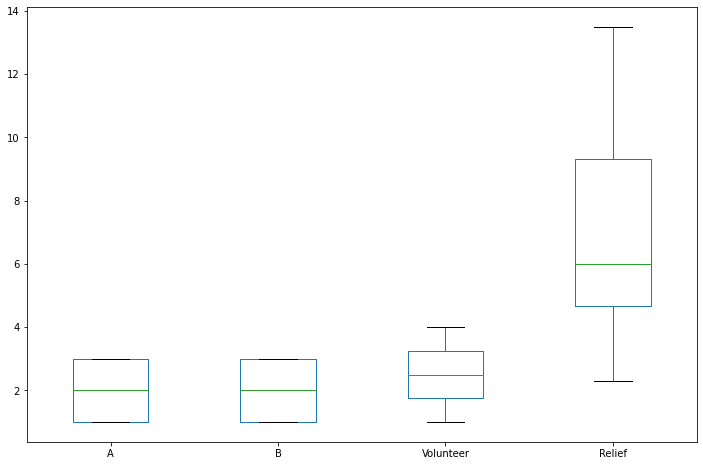

In [9]:
df.plot(kind='box',figsize=(12,8))

There are no outliers in the dataset

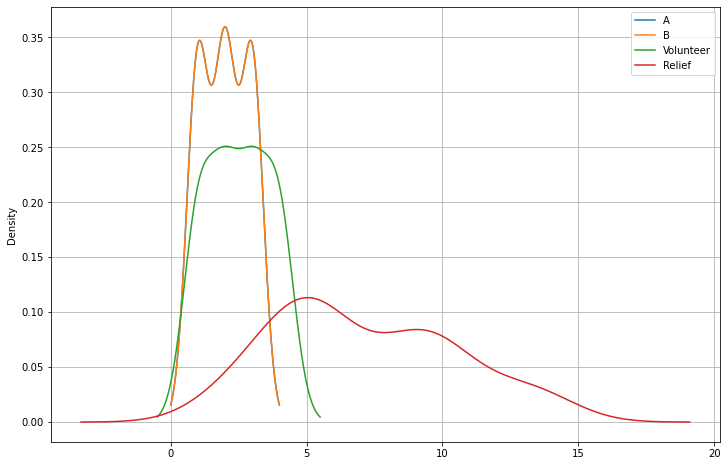

In [10]:
plt.figure(figsize=(12,8))
for i in df.columns:
    df[i].plot(kind='kde')
    plt.legend()
    plt.grid()

 <span style="font-family: Helvetica; font-weight:Regular;font-size:1.0em;color:#800080;">From the above graph, we can infer that the mean of atleast one pair of data is not equal which can result in determining that the Null Hypothesis maynot be true. Let's statistically prove the same by performing ANOVA test

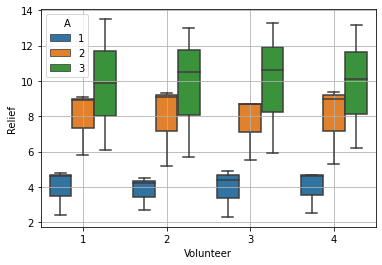

In [11]:
sns.boxplot(x="Volunteer", y="Relief", data=df,hue='A')
plt.grid()
plt.show()

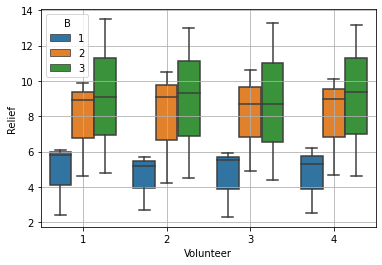

In [12]:
sns.boxplot(x="Volunteer", y="Relief", data=df,hue='B')
plt.grid()
plt.show()

 <span style="font-family: Helvetica; font-weight:Regular;font-size:1.0em;color:#800080;">From the above graph of boxplot, we can see clearly there is difference in means between variables, Relief between active ingredients and volunteers participated. However let's perform ANOVA test to confirm the same.

#### 1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually. [both statement and statistical form like Ho=mu, Ha>mu]

#### Formulate Hypothesis:

###### For active ingredient A in the compound:
   
HoA: μ1=μ2=μ3 ---> There is no significant Relief for treatment using active ingredients A in the compound.   
HaA: Atleast one pair of means are not equal ---> There is significant Relief for patients using ingredients A in the compound.
    
##### For active ingradient B in the compound:
    
HoB: μ1=μ2=μ3 ---> There is no significant Relief for treatment using ingredients B in the compound.     
HaB: Atleast one pair of means are not equal ---> There is significant Relief for patients using ingredients B in the compound.
    
###### For interaction between A & B ingredients in the compound:
    
HoAB: μ1=μ2=μ3 => There is no significant Relief for treatment using compound when A & B ingredients interact.   
HaAB: Atleast one pair of means are not equal => There is significant Relief for treatment using compound when A & B ingredients interact.

Need to convert A,B & Volunteer Columns as categorical type as they represent ingredient types with respect to volunteers participated for the study.

In [13]:
df1 = df.copy()
df1.A = pd.Categorical(df1.A)
df1.B = pd.Categorical(df1.B)
df.Volunteer = pd.Categorical(df.Volunteer)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   A          36 non-null     category
 1   B          36 non-null     category
 2   Volunteer  36 non-null     int64   
 3   Relief     36 non-null     float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 1.0 KB


Conversion A,B & Volunteer Columns as categorical type succesful as we can see in the above ouput.

#### 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

##### One-Way ANOVA test for ingredient A

###### For active ingredient A in the compound:
   
HoA: μ1=μ2=μ3 ---> There is no significant Relief for treatment using active ingredients A in the compound.   
HaA: Atleast one pair of means are not equal ---> There is significant Relief for treatment using ingredients A in the compound.

In [15]:
formula = 'Relief ~ C(A)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


 <span style="font-family: Helvetica; font-weight:Regular;font-size:1.2em;color:#2E8B57;">Ingredient A is a significant factor as the p value is <0.05. Hence we can conclude from the above test that the Null Hypothesis is NOT true. At least one of the means is different (Factor Effect is present).   
 
 <span style="font-family: Helvetica; font-weight:Regular;font-size:1.2em;color:#2E8B57;">Therefore we reject the Null hypothesis and state that there is significant Relief for patients using ingredients A in the compound.  


#### 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

##### Similarly let's perform one-way ANOVA test for ingredient B.

#### Hypothesis for active ingredient A in the compound:
    
HoB: μ1=μ2=μ3 ---> There is no significant Relief for patients using ingredients B in the compound.     
HaB: Atleast one pair of means are not equal ---> There is significant Relief for patients using ingredients B in the compound.
    

In [16]:
formula = 'Relief ~ C(B)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


 <span style="font-family: Helvetica; font-weight:Regular;font-size:1.2em;color:#1E90FF;">Ingredient B is a significant factor as the p value is <0.05. Hence we can conclude from the above test that the Null Hypothesis is NOT true. 
 
 <span style="font-family: Helvetica; font-weight:Regular;font-size:1.2em;color:#1E90FF;">At least one of the means is different (Factor Effect is present). Therefore we reject the Null hypothesis and state that there is significant Relief for patients using ingredients B in the compound. 
    
 

#### 1.4) Analyse the effects of one variable on another with the help of an interaction plot. 
What is the interaction between the two treatments?

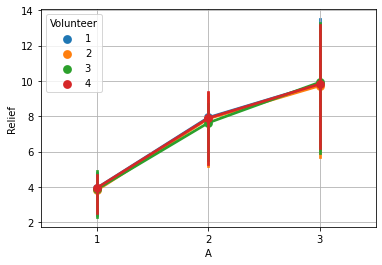

In [17]:
sns.pointplot(x = 'A', y = 'Relief',hue='Volunteer', data=df1)
plt.grid()
plt.show()

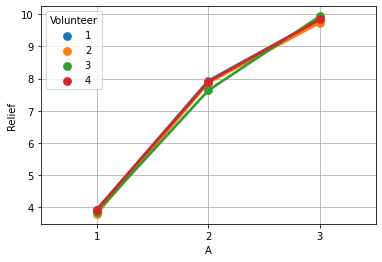

In [18]:
sns.pointplot(x = 'A', y = 'Relief',hue='Volunteer', data=df1,ci=None)
plt.grid()
plt.show()

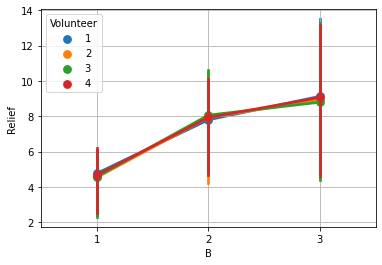

In [19]:
sns.pointplot(x = 'B', y = 'Relief',hue='Volunteer', data=df1)
plt.grid()
plt.show()

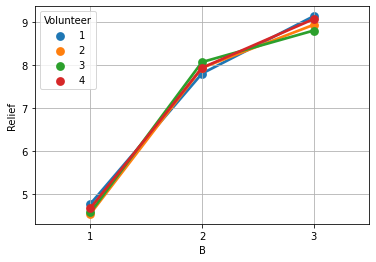

In [20]:
sns.pointplot(x = 'B', y = 'Relief',hue='Volunteer', data=df1,ci=None)
plt.grid()
plt.show()

 <span style="font-family: Helvetica; font-weight:Regular;font-size:1.2em;color:#DC143C;">From the above graphs with Confidence interval and no CI, we can infer that there is significant difference in 'Relief' (dependant variable) and the ingredients 'A','B' however being Volunteer has no significance on the dependant variable 'Relief' as it is parallel to the point plot of A.

#### 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’ along with their interaction 'A*B') with the variable 'Relief' and state your results.

###### Hypothesis for interaction between A & B ingredients in the compound:
    
HoAB: μ1=μ2=μ3 => There is no significant Relief for patients using compound when A & B ingredients interact.   
HaAB: Atleast one pair of means are not equal => There is significant Relief for patients using compound when A & B ingredients interact.

In [21]:
#Interaction Effect:
model=ols('Relief~C(A)+C(B)+C(Volunteer)+C(A):C(B)',data=df1).fit()
aov_table=anova_lm(model)
print(aov_table)

                df      sum_sq     mean_sq            F        PR(>F)
C(A)           2.0  220.020000  110.010000  1700.333453  1.403185e-26
C(B)           2.0  123.660000   61.830000   955.655098  1.322903e-23
C(Volunteer)   3.0    0.072222    0.024074     0.372093  7.738510e-01
C(A):C(B)      4.0   29.425000    7.356250   113.699463  3.119446e-15
Residual      24.0    1.552778    0.064699          NaN           NaN


### <span style="font-family: Helvetica; font-weight:Regular;font-size:1.2em;color:#008B8B;">While analysing the interaction between two ingredients A & B of the compound, from the above statistical results performing ANOVA, the following are the findings:

 <span style="font-family: Helvetica; font-weight:Regular;font-size:1.2em;color:#15A9D5;">1. The interaction between ingredients A & B are significant as the p value is <0.05. This means there is a cause-effect relationship between these variables when they interact.  


 <span style="font-family: Helvetica; font-weight:Regular;font-size:1.2em;color:#15A9D5;">2. Also the cause-effect of ingredients A & B are significant hence we reject the Null Hypothesis and state that there is significant Relief on treatment using compound when A & B ingredients interact.   


 <span style="font-family: Helvetica; font-weight:Regular;font-size:1.2em;color:#15A9D5;">3. 'Volunteer' variable has no significance since p value>0.05 and hence can state that Volunteer does not show cause-effect on Relief irrespective of compounds used.   

#### 1.6) Mention the business implications of performing ANOVA for this particular case study.

  <font color=lightslategrey>This technique is part of the domain called “Experimental Designs”.
 
  This helps in establishing in a precise fashion the Cause - Effect relation amongst Relief (dependant) and     ingredients of compounds A & B (Independent) variables. 'Volunteer' is level 2 and an independent variable.
  ANOVA decomposes the total variation into components of variation. That is, explaining the changes in the       response variable ('Relief') caused by these components A & B.
    
  
  The two-way ANOVA compares the mean differences between groups that have been split on two independent         variables (called factors).The primary purpose of a two-way ANOVA to understand if there is an interaction     between the two independent variables on the dependent variable. In this case the independent variables A,     B & Volunteer interacting on the dependent variable 'Relief'


<font color=darkslategrey>---------------------------------------------------------------------  End of Report -------------------------------------------------------------------------------------